In [2]:

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
%matplotlib inline


In [3]:
train = pd.read_csv(r'C:\Users\acoun\Desktop\ImageClassfication\Multi_Label_dataset\train.csv')   
train.info()     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7254 entries, 0 to 7253
Data columns (total 27 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           7254 non-null   object
 1   Tags         7254 non-null   object
 2   Action       7254 non-null   int64 
 3   Adventure    7254 non-null   int64 
 4   Animation    7254 non-null   int64 
 5   Biography    7254 non-null   int64 
 6   Comedy       7254 non-null   int64 
 7   Crime        7254 non-null   int64 
 8   Documentary  7254 non-null   int64 
 9   Drama        7254 non-null   int64 
 10  Family       7254 non-null   int64 
 11  Fantasy      7254 non-null   int64 
 12  History      7254 non-null   int64 
 13  Horror       7254 non-null   int64 
 14  Music        7254 non-null   int64 
 15  Musical      7254 non-null   int64 
 16  Mystery      7254 non-null   int64 
 17  N/A          7254 non-null   int64 
 18  News         7254 non-null   int64 
 19  Reality-TV   7254 non-null 

In [4]:
ranges = 1000
train_image = []
for i in tqdm(range(ranges)):
    img = image.load_img('Images/'+train['Id'][i]+'.jpg',target_size=(400,400,3))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)

y = np.array(train.drop(['Id', 'Tags'],axis=1))
y = y[0:ranges, :]

100%|██████████| 1000/1000 [00:04<00:00, 244.04it/s]


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [14]:
#create the model
model1 = Sequential()
model1.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(400,400,3)))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))

model1.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))

model1.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))

model1.add(Flatten())

model1.add(Dense(64, activation='relu'))
model1.add(Dropout(0.5))

model1.add(Dense(25, activation='sigmoid'))
model1.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 396, 396, 16)      1216      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 198, 198, 16)      0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 198, 198, 16)      0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 194, 194, 32)      12832     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 97, 97, 32)        0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 97, 97, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 93, 93, 64)       

In [15]:
model2 = Sequential()
model2.add(Conv2D(filters=16, kernel_size=(5, 5), activation='relu', input_shape = (400,400,3)))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

model2.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

model2.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

model2.add(Flatten())

model2.add(Dense(64, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))

model2.add(Dense(25, activation='sigmoid'))
model2.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 396, 396, 16)      1216      
_________________________________________________________________
batch_normalization_9 (Batch (None, 396, 396, 16)      64        
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 198, 198, 16)      0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 198, 198, 16)      0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 194, 194, 32)      12832     
_________________________________________________________________
batch_normalization_10 (Batc (None, 194, 194, 32)      128       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 97, 97, 32)       

In [17]:
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [18]:
history1 = model1.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), batch_size=64)

Epoch 1/50
13/13 [==============================] - 89s 7s/step - loss: 1.1308 - accuracy: 0.0516 - val_loss: 0.4671 - val_accuracy: 0.1900
Epoch 2/50
13/13 [==============================] - 83s 6s/step - loss: 0.4808 - accuracy: 0.0731 - val_loss: 0.4715 - val_accuracy: 0.0150
Epoch 3/50
13/13 [==============================] - 80s 6s/step - loss: 0.4425 - accuracy: 0.1221 - val_loss: 0.4543 - val_accuracy: 0.1900
Epoch 4/50
13/13 [==============================] - 82s 6s/step - loss: 0.4098 - accuracy: 0.1121 - val_loss: 0.3969 - val_accuracy: 0.1950
Epoch 5/50
13/13 [==============================] - 83s 6s/step - loss: 0.3862 - accuracy: 0.1074 - val_loss: 0.3807 - val_accuracy: 0.2000
Epoch 6/50
13/13 [==============================] - 82s 6s/step - loss: 0.3582 - accuracy: 0.1616 - val_loss: 0.3687 - val_accuracy: 0.3550
Epoch 7/50
13/13 [==============================] - 82s 6s/step - loss: 0.3400 - accuracy: 0.1970 - val_loss: 0.3226 - val_accuracy: 0.2600
Epoch 8/50
13/13 [==

In [19]:
history2 = model2.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), batch_size=64)

Epoch 1/50
13/13 [==============================] - 142s 11s/step - loss: 0.9125 - accuracy: 0.0283 - val_loss: 0.7049 - val_accuracy: 0.0750
Epoch 2/50
13/13 [==============================] - 141s 11s/step - loss: 0.8066 - accuracy: 0.0651 - val_loss: 0.7999 - val_accuracy: 0.0850
Epoch 3/50
13/13 [==============================] - 141s 11s/step - loss: 0.7820 - accuracy: 0.0844 - val_loss: 0.7611 - val_accuracy: 0.0050
Epoch 4/50
13/13 [==============================] - 143s 11s/step - loss: 0.7514 - accuracy: 0.1145 - val_loss: 0.8785 - val_accuracy: 0.0650
Epoch 5/50
13/13 [==============================] - 143s 11s/step - loss: 0.7242 - accuracy: 0.1232 - val_loss: 0.8986 - val_accuracy: 0.1600
Epoch 6/50
13/13 [==============================] - 142s 11s/step - loss: 0.7074 - accuracy: 0.1469 - val_loss: 0.6626 - val_accuracy: 0.2400
Epoch 7/50
13/13 [==============================] - 142s 11s/step - loss: 0.6791 - accuracy: 0.1615 - val_loss: 0.5468 - val_accuracy: 0.2650
Epoch 

Text(0.5, 1.0, 'Training and Validation Accuracy')

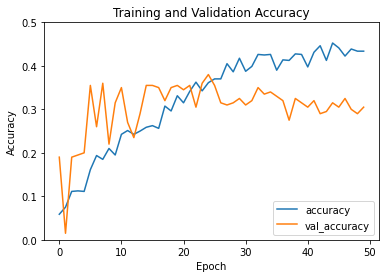

In [31]:
plt.plot(history1.history['accuracy'], label='accuracy')
plt.plot(history1.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0,0.5])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')


Text(0.5, 1.0, 'Training and Validation Accuracy')

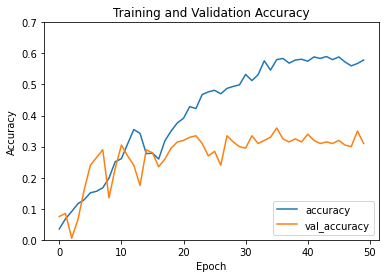

In [32]:
plt.plot(history2.history['accuracy'], label='accuracy')
plt.plot(history2.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0,0.7])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')


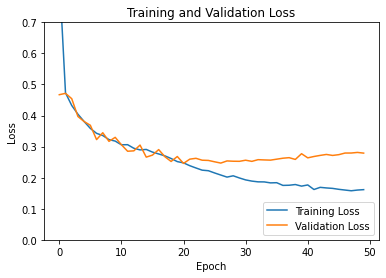

In [21]:

plt.plot(history1.history['loss'] , label='Training Loss')
plt.plot(history1.history['val_loss'] , label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0,0.7])
plt.legend(loc='lower right')
plt.title('Training and Validation Loss')
plt.show()

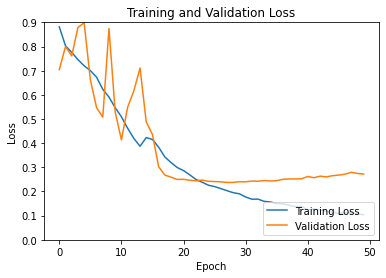

In [33]:

plt.plot(history2.history['loss'] , label='Training Loss')
plt.plot(history2.history['val_loss'] , label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0,0.9])
plt.legend(loc='lower right')
plt.title('Training and Validation Loss')
plt.show()

In [27]:
test_loss1, test_acc1 = model1.evaluate(X_test,  y_test, verbose=10)
test_loss2, test_acc2 = model2.evaluate(X_test,  y_test, verbose=10)
print(test_loss1)
print(test_acc1)
print(test_loss2)
print(test_acc2)

0.27905091643333435
0.3050000071525574
0.27197492122650146
0.3100000023841858


In [23]:
img = image.load_img('wanda-vision-vietsub.jpg',target_size=(400,400,3))
img = image.img_to_array(img)
img = img/255

Comedy (0.47)
Drama (0.45)
Action (0.14)
Romance (0.1)
Crime (0.062)


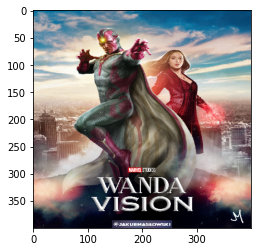

In [24]:

classes = np.array(train.columns[2:])
proba = model1.predict(img.reshape(1,400,400,3))
top_5 = np.argsort(proba[0])[:-6:-1]
for i in range(5):
    print("{}".format(classes[top_5[i]])+" ({:.2})".format(proba[0][top_5[i]]))
plt.imshow(img)

In [26]:
classes = np.array(train.columns[2:])
proba = model2.predict(img.reshape(1,400,400,3))
top_5 = np.argsort(proba[0])[:-6:-1]
for i in range(5):
    print("{}".format(classes[top_5[i]])+" ({:.2})".format(proba[0][top_5[i]]))

Drama (0.69)
Crime (0.33)
Comedy (0.3)
Action (0.24)
Family (0.2)
